<a href="https://colab.research.google.com/github/VadymKalin/nvidia_certified_associate_generative_ai_llms/blob/main/tensorflow_and_pytrorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [5]:
X_train.shape


(55000, 28, 28)

In [6]:
#nomralization
import numpy as np


In [7]:
np.max(X_train),np.min(X_train)

(np.uint8(255), np.uint8(0))

In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

np.max(X_train),np.min(X_train)



(np.float64(1.0), np.float64(0.0))

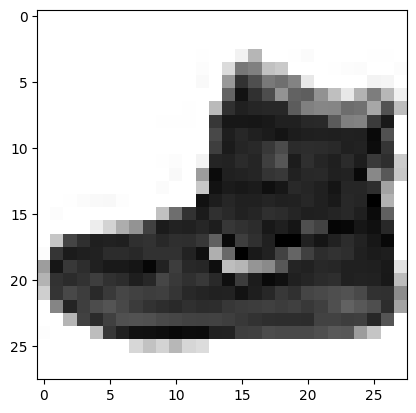

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


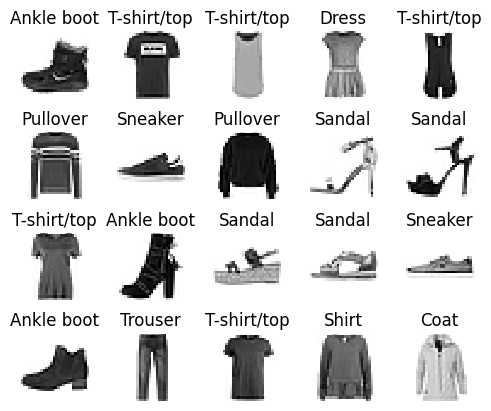

In [11]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

model = Sequential()
model.add(InputLayer(shape=[28,28]))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6568 - loss: 1.0807 - val_accuracy: 0.8108 - val_loss: 0.5414
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8166 - loss: 0.5252 - val_accuracy: 0.8254 - val_loss: 0.4827
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8376 - loss: 0.4702 - val_accuracy: 0.8396 - val_loss: 0.4553
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8470 - loss: 0.4355 - val_accuracy: 0.8526 - val_loss: 0.4161
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8552 - loss: 0.4128 - val_accuracy: 0.8568 - val_loss: 0.4067
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8611 - loss: 0.3975 - val_accuracy: 0.8572 - val_loss: 0.4237
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8644 - loss: 0.3852 - val_accuracy: 0.8610 - val_loss: 0.3922
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8675 - loss: 0.3729 -

# Task
Adapt the previous TensorFlow code for classifying Fashion MNIST images to use PyTorch instead.

## Load and preprocess data using pytorch

### Subtask:
Load the Fashion MNIST dataset using PyTorch's `torchvision` library and apply necessary transformations.


**Reasoning**:
The subtask requires loading and transforming the Fashion MNIST dataset using PyTorch. This involves importing necessary modules, defining transformations, loading the datasets, and creating data loaders. These steps can be grouped into a single code block.



In [15]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# 2. Load datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# Split the training dataset into training and validation sets
train_size = int(0.9 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [train_size, valid_size])

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 3. Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.61MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 4.29MB/s]

Number of training samples: 54000
Number of validation samples: 6000
Number of test samples: 10000


## Define the neural network in pytorch

### Subtask:
Create a PyTorch model with a similar architecture to the TensorFlow model (flatten layer and dense layers).


**Reasoning**:
Define a PyTorch model with a similar architecture to the TensorFlow model and print its summary.



In [17]:
import torch.nn as nn
import torch.nn.functional as F

# 2. Define a class that inherits from torch.nn.Module
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        # 3. Define the layers of the network
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 100) # Input size 28*28 = 784
        self.fc2 = nn.Linear(100, 75)
        self.fc3 = nn.Linear(75, 10) # 10 output classes for Fashion MNIST

    # 4. Define the forward pass
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # No activation on the output layer for cross-entropy loss
        return x

# 5. Instantiate an object of the defined model class
model = FashionMNISTModel()

# 6. Print the model architecture
print(model)

FashionMNISTModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=75, bias=True)
  (fc3): Linear(in_features=75, out_features=10, bias=True)
)


In [20]:
# prompt: train the model

# ## Train the model in pytorch

# ### Subtask:
# Train the PyTorch model using an optimizer and a loss function.

# **Reasoning**:
# Train the defined PyTorch model using a specified optimizer and loss function.

# 1. Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # Suitable for multi-class classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 2. Define the training loop
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=30):
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Evaluate on the validation set after each epoch
        model.eval()  # Set the model to evaluation mode
        valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        valid_loss_avg = valid_loss / len(valid_loader)
        accuracy = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Valid Loss: {valid_loss_avg:.4f}, Valid Accuracy: {accuracy:.2f}%")

# 3. Train the model
train_model(model, train_loader, valid_loader, criterion, optimizer)

Epoch [1/30], Train Loss: 1.5176, Valid Loss: 0.8945, Valid Accuracy: 66.43%
Epoch [2/30], Train Loss: 0.7714, Valid Loss: 0.6769, Valid Accuracy: 75.67%
Epoch [3/30], Train Loss: 0.6378, Valid Loss: 0.5794, Valid Accuracy: 79.87%
Epoch [4/30], Train Loss: 0.5676, Valid Loss: 0.5433, Valid Accuracy: 81.70%
Epoch [5/30], Train Loss: 0.5271, Valid Loss: 0.4984, Valid Accuracy: 82.38%
Epoch [6/30], Train Loss: 0.5009, Valid Loss: 0.5032, Valid Accuracy: 81.50%
Epoch [7/30], Train Loss: 0.4802, Valid Loss: 0.4665, Valid Accuracy: 83.62%
Epoch [8/30], Train Loss: 0.4651, Valid Loss: 0.4408, Valid Accuracy: 84.47%
Epoch [9/30], Train Loss: 0.4519, Valid Loss: 0.4291, Valid Accuracy: 84.85%
Epoch [10/30], Train Loss: 0.4418, Valid Loss: 0.4273, Valid Accuracy: 85.00%
Epoch [11/30], Train Loss: 0.4314, Valid Loss: 0.4262, Valid Accuracy: 84.60%
Epoch [12/30], Train Loss: 0.4243, Valid Loss: 0.4083, Valid Accuracy: 85.38%
Epoch [13/30], Train Loss: 0.4158, Valid Loss: 0.4149, Valid Accuracy: 85